# matplotlib를 사용해 시각화 예제를 실습해보자
## basic plotting with matplotlib

In [1]:
import numpy as np
import pandas as pd

# x 값 세팅
x = np.linspace(0, 10, 30)

# y1과 y2 값 세팅
y1 = 4*x*x + 2*x + 2
y2 = 3*x + 4

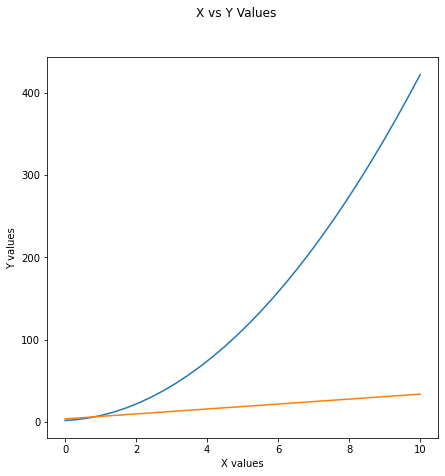

In [2]:
# 
# plot with matplotlib
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# figure 생성
plt.figure(figsize=(7,7))
# plot suptitle 설정
plt.suptitle('X vs Y Values')

# y1 = 4*x*x + 2*x + 2
plt.plot(x, y1)

# y2 = 3*x + 4
plt.plot(x, y2)

# 축 labels 설정
plt.xlabel('X values')
plt.ylabel('Y values')

# plot 보여주기
plt.show()

Text(0.5, 1.0, 'Subplot 3')

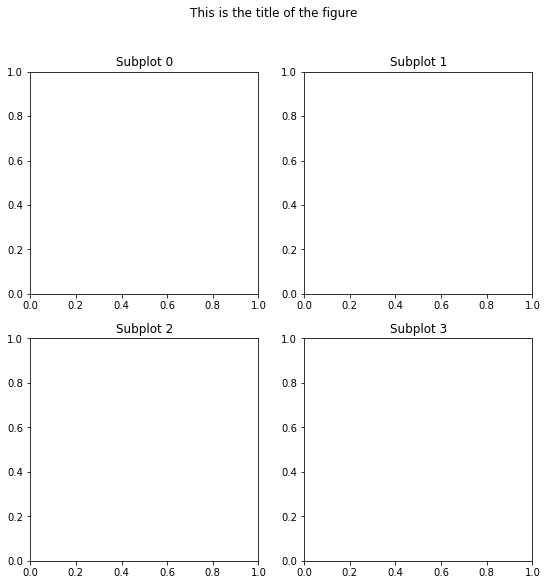

In [3]:
#  2 x 2 axes 객체를 이루는 figure 생성
figure, axes_list  = plt.subplots(2,2, figsize=(9,9))

# figure 객체 타이틀 설정
figure.suptitle('This is the title of the figure')  

# axis 객체에 각각의 타이틀 설정
axes_list[0,0].set_title('Subplot 0')
axes_list[0,1].set_title('Subplot 1')
axes_list[1,0].set_title('Subplot 2')
axes_list[1,1].set_title('Subplot 3')


## histograms

In [4]:
import numpy as np
import pandas as pd

In [5]:
# titanic_dataset 불러오기
input_file = './train.csv'
df_titanic = pd.read_csv(input_file)

# PassengerId로 index 설정
df_titanic.set_index("PassengerId", inplace=True)

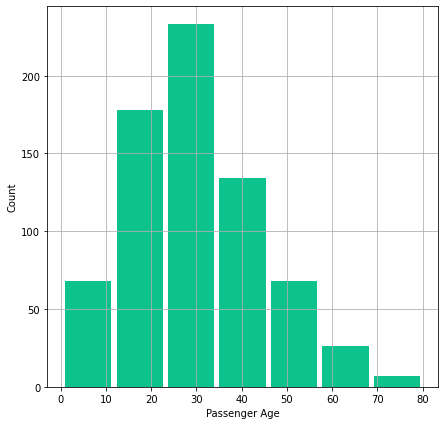

In [9]:
# pyplot으로 'Age' 히스토그램 생성
fig = plt.figure(figsize=(7,7))
plt.xlabel('Passenger Age')
plt.ylabel('Count')
plt.grid()

# histtype='bar' => 히스토그램이 막대 형태
# color='#0dc28d => 막대의 색 설정
# rwidth=0.90 => 구각의 폭을 90% 설정해 구간과 구간 사이에 공간을 두도록 설정
# bins=7 => 구간의 개수
n, bins, patches = plt.hist(df_titanic['Age'], histtype='bar', 
                            color='#0dc28d', align='mid', 
                            rwidth=0.90, bins=7)
# n = 각 구간에 속한 데이터의 개수
# bins = 구간의 경계값을 나타내는 부동소수점 값들의 배열
# patches = matplotlib이 구간을 생성하는데 필요한 기초 정보를 나타내는 사각형 객체의 배열


In [10]:
print (n)
print (bins)
print (patches[0])

[ 68. 178. 233. 134.  68.  26.   7.]
[ 0.42       11.78857143 23.15714286 34.52571429 45.89428571 57.26285714
 68.63142857 80.        ]
Rectangle(xy=(0.988429, 0), width=10.2317, height=68, angle=0)


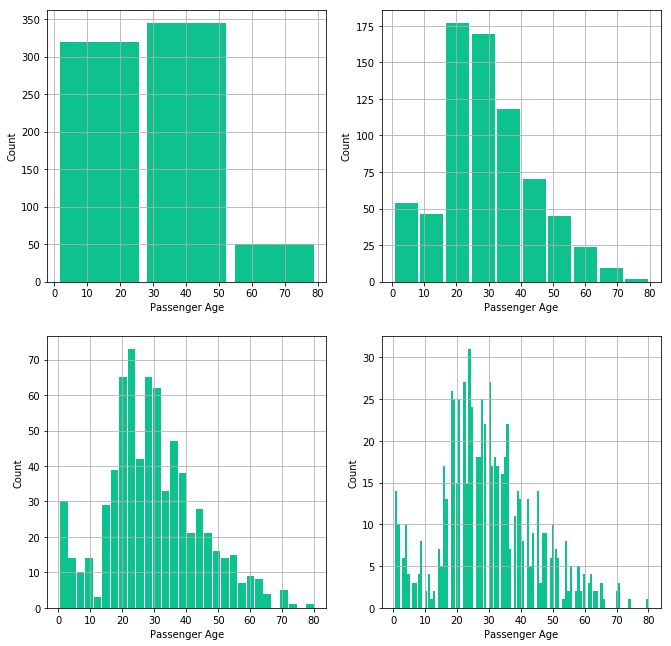

In [64]:
# pyplot과 matplotlib을 활용해 동일한 데이터를 다른 bin의 값을 갑는 여러 개의 히스토그램을 만들어보자
# 즉, 구간 개수를 변경해 다양한 히스토그램을 만들어보자

fig, axes_list = plt.subplots(2,2, figsize=(11,11))

# bins = 3인 histogram
axes_list[0,0].set_xlabel('Passenger Age')
axes_list[0,0].set_ylabel('Count')
axes_list[0,0].grid()

n1, bins1, patches1 = axes_list[0,0].hist(df_titanic['Age'], histtype='bar', 
                            color='#0dc28d', align='mid', 
                            rwidth=0.90, bins=3)


# bins = 10인 histogram
axes_list[0,1].set_xlabel('Passenger Age')
axes_list[0,1].set_ylabel('Count')
axes_list[0,1].grid()
n2, bins2, patches2 = axes_list[0,1].hist(df_titanic['Age'], histtype='bar', 
                            color='#0dc28d', align='mid', 
                            rwidth=0.90, bins=10)

# bins = 30인 histogram
axes_list[1,0].set_xlabel('Passenger Age')
axes_list[1,0].set_ylabel('Count')
axes_list[1,0].grid()
n3, bins3, patches3 = axes_list[1,0].hist(df_titanic['Age'], histtype='bar', 
                            color='#0dc28d', align='mid', 
                            rwidth=0.90, bins=30)

# bins = 100인 histogram
axes_list[1,1].set_xlabel('Passenger Age')
axes_list[1,1].set_ylabel('Count')
axes_list[1,1].grid()
n4, bins4, patches4 = axes_list[1,1].hist(df_titanic['Age'], histtype='bar', 
                            color='#0dc28d', align='mid', 
                            rwidth=0.90, bins=100)

## bar charts

([<matplotlib.axis.XTick at 0x7fa470533c10>,
 [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q'), Text(3, 0, 'nan')])

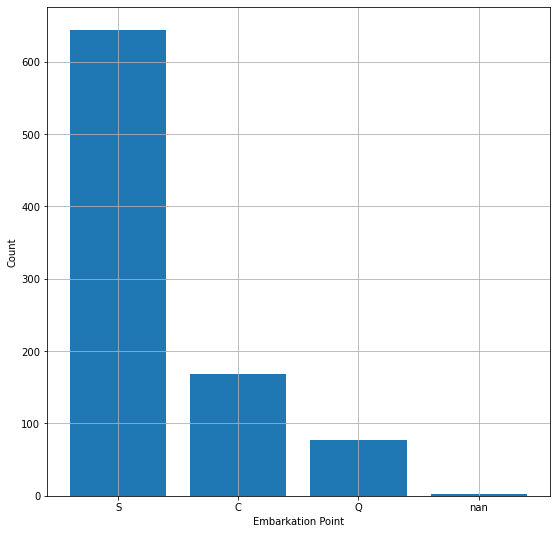

In [11]:
# pyplot 함수로 Embarked 속성을 bar chart로 나타내기
fig = plt.figure(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.grid()

values = df_titanic['Embarked'].unique()
counts = df_titanic['Embarked'].value_counts(dropna=False)
x_positions = np.arange(len(values))

plt.bar(x_positions, counts, align='center')
plt.xticks(x_positions, values)


## Group Bar Chart

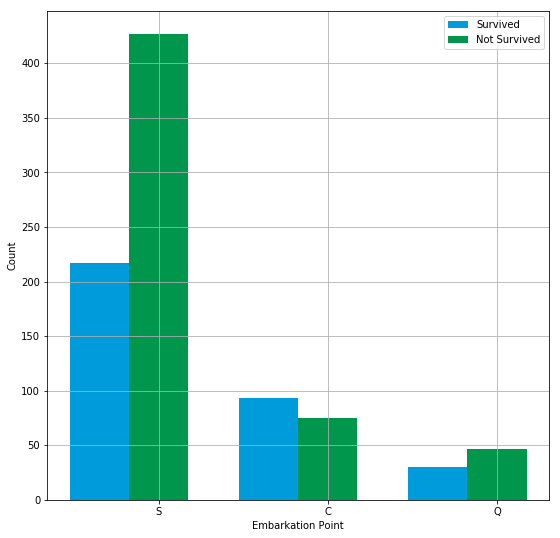

In [66]:
# 그룹당 2개의 막대를 갖는 Embarked 속성의 Group Bar Chart를 만들어보자

survived_df = df_titanic[df_titanic['Survived']==1] # 그룹 1
not_survived_df = df_titanic[df_titanic['Survived']==0] # 그룹 2

values = df_titanic['Embarked'].dropna().unique() 
embarked_counts_survived = survived_df['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = not_survived_df['Embarked'].value_counts(dropna=True)

x_positions = np.arange(len(values))

fig = plt.figure(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.grid()

bar_width = 0.35

plt.bar(x_positions, embarked_counts_survived, bar_width, color='#009bdb', label='Survived')
plt.bar(x_positions + bar_width, embarked_counts_not_survived, bar_width, color='#00974d', label='Not Survived')

plt.xticks(x_positions + bar_width, values)
plt.legend()

plt.show()

## Stacked Bar Chart

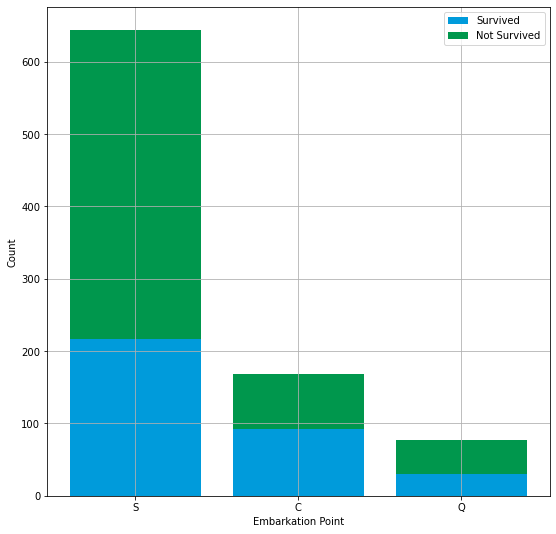

In [13]:
# 누적 막대 그래프 실습

# Embarked 속성 데이터를이용해 탑승 지점에 따른 생존 여부를 누적 막대 그래프로 표현
survived_df = df_titanic[df_titanic['Survived']==1]
not_survived_df = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
embarked_counts_survived = survived_df['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = not_survived_df['Embarked'].value_counts(dropna=True)

x_positions = np.arange(len(values))

fig = plt.figure(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.grid()

plt.bar(x_positions, embarked_counts_survived, color='#009bdb', label='Survived')
plt.bar(x_positions, embarked_counts_not_survived, color='#00974d', label='Not Survived', bottom=embarked_counts_survived)

plt.xticks(x_positions, values)
plt.legend()

plt.show()

## Stacked Percentage Bar Chart

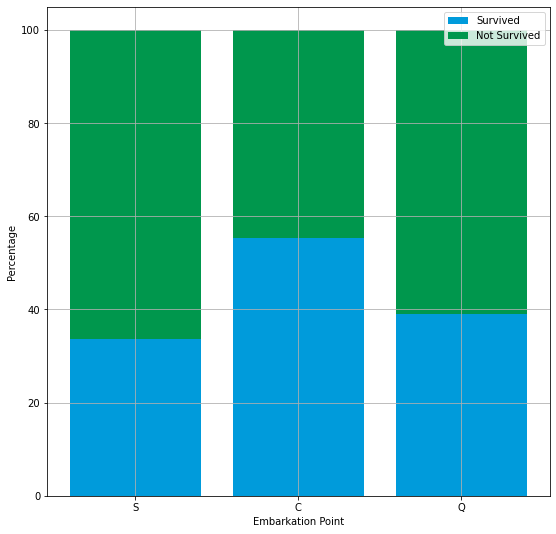

In [14]:
# Embarked 속성 데이터를 이용해 탑승 지점에 따른 생존 여부를 누적 백분율 막대 그래프로 표현
survived_df = df_titanic[df_titanic['Survived']==1]
not_survived_df = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
counts = df_titanic['Embarked'].value_counts(dropna=True)

embarked_counts_survived = survived_df['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = not_survived_df['Embarked'].value_counts(dropna=True)

embarked_counts_survived_percent = embarked_counts_survived / counts * 100
embarked_counts_not_survived_percent = embarked_counts_not_survived / counts * 100

x_positions = np.arange(len(values))

fig = plt.figure(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Percentage')
plt.grid()

plt.bar(x_positions, embarked_counts_survived_percent, color='#009bdb', label='Survived')
plt.bar(x_positions, embarked_counts_not_survived_percent, color='#00974d', label='Not Survived', bottom=embarked_counts_survived_percent)

plt.xticks(x_positions, values)
plt.legend()

plt.show()


## pie chart
- 막대 그래프의 대안으로 범주형 데이터의 비율을 나타낼 때 사용

([<matplotlib.patches.Wedge at 0x1a2cc7f3c8>,
 [Text(-0.8377704870586525, -0.7128398214280037, 'S'),
  Text(0.9985298270476893, 0.46145225592265965, 'C'),
  Text(0.295637013749575, 1.059527609881514, 'Q')],
 [Text(-0.45696572021381043, -0.3888217207789111, '72.4%'),
  Text(0.5446526329351032, 0.25170123050326887, '18.9%'),
  Text(0.16125655295431363, 0.5779241508444621, '8.7%')])

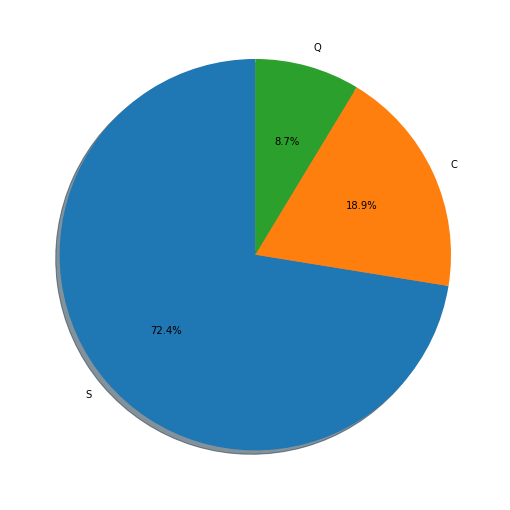

In [69]:
# Embarked 속성에서 탑승 지점별로 탑승한 승객 비율을 파이 차트로 생성

fig = plt.figure(figsize=(9,9))

embarkation_ports = df_titanic['Embarked'].dropna().unique()
counts = df_titanic['Embarked'].value_counts(dropna=True)

total_embarked = counts.values.sum()
counts_percentage = counts / total_embarked * 100

counts_percentage.values
plt.pie(counts_percentage.values, 
        labels=embarkation_ports, 
        autopct='%1.1f%%', shadow=True, startangle=90)


Text(0.5, 1.0, 'Queenstown')

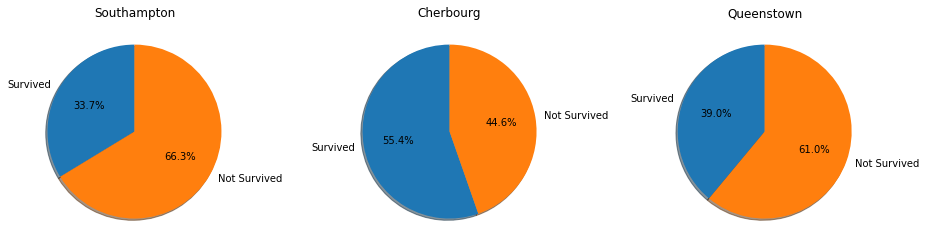

In [70]:
# 탑승 지점별로 생존자 비율을 파이 차트로 생성
# S = Southampton
# C = Cherbourg
# Q = Queenstown
S_df = df_titanic[df_titanic['Embarked'] == 'S']
C_df = df_titanic[df_titanic['Embarked'] == 'C']
Q_df = df_titanic[df_titanic['Embarked'] == 'Q']

S_Total_Embarked = S_df['Embarked'].count()
S_Survived_Count = S_df[S_df['Survived']==1].Embarked.count()
S_Survived_Percentge = S_Survived_Count / S_Total_Embarked * 100
S_Not_Survived_Percentge = 100.0 - S_Survived_Percentge

C_Total_Embarked = C_df['Embarked'].count()
C_Survived_Count = C_df[C_df['Survived']==1].Embarked.count()
C_Survived_Percentge = C_Survived_Count / C_Total_Embarked * 100
C_Not_Survived_Percentge = 100.0 - C_Survived_Percentge

Q_Total_Embarked = Q_df['Embarked'].count()
Q_Survived_Count = Q_df[Q_df['Survived']==1].Embarked.count()
Q_Survived_Percentge = Q_Survived_Count / Q_Total_Embarked * 100
Q_Not_Survived_Percentge = 100.0 - Q_Survived_Percentge


fig, axes = plt.subplots(1, 3, figsize=(16,4))

Wedge_Labels = ['Survived', 'Not Survived']
S_Wedge_Sizes = [S_Survived_Percentge, S_Not_Survived_Percentge]
C_Wedge_Sizes = [C_Survived_Percentge, C_Not_Survived_Percentge]
Q_Wedge_Sizes = [Q_Survived_Percentge, Q_Not_Survived_Percentge]

axes[0].pie(S_Wedge_Sizes, labels=Wedge_Labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Southampton')

axes[1].pie(C_Wedge_Sizes, labels=Wedge_Labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title('Cherbourg')

axes[2].pie(Q_Wedge_Sizes, labels=Wedge_Labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[2].set_title('Queenstown')

## box plots
- 수치형 데이터의 분포을 확인하는데 유용

[Text(0, 0, 'Age')]

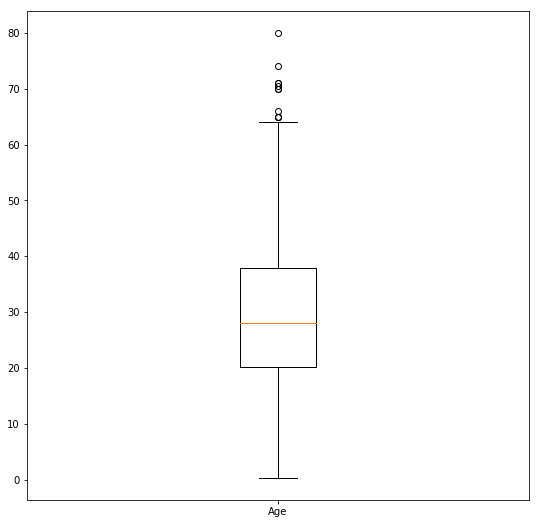

In [71]:
#'Age' 속성을 box plot 생성 
fig , axes = plt.subplots(figsize=(9,9))
box_plot = plt.boxplot(df_titanic['Age'].dropna())
axes.set_xticklabels(['Age'])

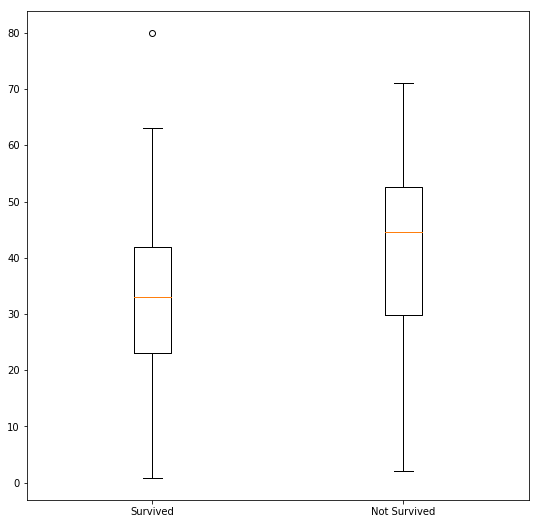

In [72]:
# 타이타닉 사고 생존자와 사망자의 Age 속성을 boxplot으로 나타내기
survived_df = df_titanic[df_titanic['Survived']==1].dropna()
not_survived_df = df_titanic[df_titanic['Survived']==0].dropna()

fig , axes = plt.subplots(figsize=(9,9))
box_plot = plt.boxplot([survived_df['Age'], not_survived_df['Age']], 
                       labels=['Survived', 'Not Survived'])

## scatter plots (산점도)
- 두 개의 연속적인 수치형 데이터를 짝지어 표현하는 도표
- 일반적으로 두 변수의 상관관계를 표현하거나 데이터의 군집을 시각화하는데 사용

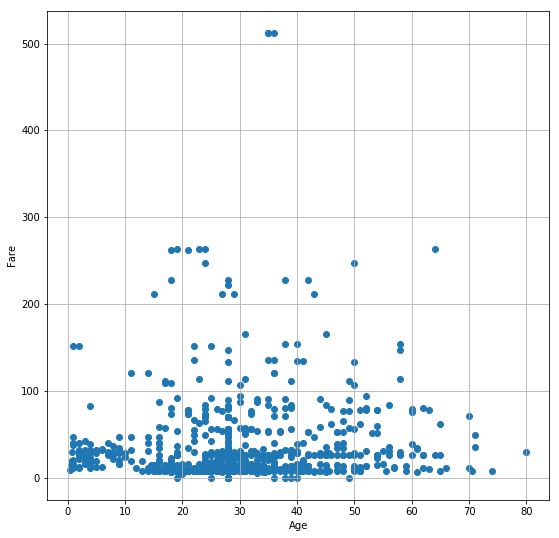

In [73]:
# 'Age'와 'Fare' 속성에 대해 산점도 표현

# 결측값 대처
# Age: 중간값
# Fare: 평균
median_age = df_titanic['Age'].median()
df_titanic["Age"].fillna(median_age, inplace=True)

mean_fare = df_titanic['Fare'].mean()
df_titanic["Fare"].fillna(mean_fare, inplace=True)

fig , axes = plt.subplots(figsize=(9,9))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()

plt.scatter(df_titanic['Age'], df_titanic['Fare'])

In [ ]:
print('Done')